# 2nd Notebook for Machine Learning Intro Lecture

## 1 vs. all via logistic Regression

Change labels in data to "virginica" and other to create a binary classification task

In [2]:
data(iris)
set.seed(1327)
trainSize = 3/4
trainIndices = sample(x = seq(1, nrow(iris), by = 1), size = ceiling(trainSize * nrow(iris)), replace = FALSE)


################# virginica vs. all

irisTrainvirginica = iris[ trainIndices, ]
levels(irisTrainvirginica$Species) = c(levels(irisTrainvirginica$Species), "other")
irisTrainvirginica$Species = ifelse(irisTrainvirginica$Species == "virginica", "virginica", "other")
levels(irisTrainvirginica$Species) = c("virginica", "other")

irisTestvirginica = iris[ -trainIndices, ]
levels(irisTestvirginica$Species) = c(levels(irisTestvirginica$Species), "other")
irisTestvirginica$Species = ifelse(irisTestvirginica$Species == "virginica", "virginica", "other")
levels(irisTestvirginica$Species) = c("virginica", "other")

head(irisTrainvirginica)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
126,7.2,3.2,6.0,1.8,virginica
137,6.3,3.4,5.6,2.4,virginica
11,5.4,3.7,1.5,0.2,other
6,5.4,3.9,1.7,0.4,other
61,5.0,2.0,3.5,1.0,other
110,7.2,3.6,6.1,2.5,virginica


fit a logistic regression model on that task:

In [3]:
library(mlr)
irisTask = makeClassifTask(data = irisTrainvirginica, target = "Species")
irisLearner = makeLearner("classif.logreg")
irisModel = train(learner = irisLearner, task = irisTask)
irisPred = predict(irisModel, newdata = irisTestvirginica[, -5])
print(table(irisPred$data$response, irisTestvirginica$Species))
(mmce = round(length(which(irisPred$data$response != irisTestvirginica$Species)) / length(irisPred$data$response), 5))



Loading required package: ParamHelpers
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

           
            other virginica
  other        28         0
  virginica     1         8


[1] 0.02703

plot of the  decision boundary that the model learned. Remember that this plot is created using train data only

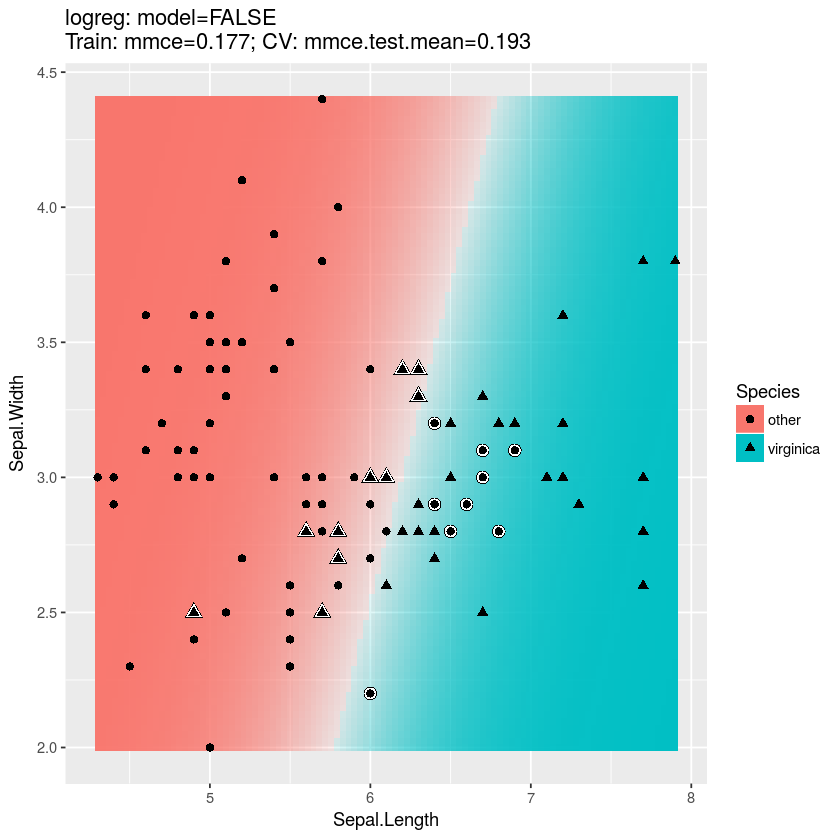

In [4]:
plotLearnerPrediction(irisLearner, irisTask)

## 2. Multi-class via Softmax Regression

We can also use the softmax regression from the lecture to handle problems with more than two classes such as the original iris problem:


In [8]:
data(iris)
set.seed(1327)
trainSize = 3/4
trainIndices = sample(x = seq(1, nrow(iris), by = 1), size = ceiling(trainSize * nrow(iris)), replace = FALSE)

irisTrain = iris[ trainIndices, ]
irisTest = iris[ -trainIndices, ]
head(irisTrain)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
126,7.2,3.2,6.0,1.8,virginica
137,6.3,3.4,5.6,2.4,virginica
11,5.4,3.7,1.5,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
61,5.0,2.0,3.5,1.0,versicolor
110,7.2,3.6,6.1,2.5,virginica


In [9]:
irisTask = makeClassifTask(data = irisTrain, target = "Species")
irisLearner = makeLearner("classif.multinom")
irisModel = train(learner = irisLearner, task = irisTask)
irisPred = predict(irisModel, newdata = irisTest[, -5])
print(table(irisPred$data$response, irisTest$Species))
(mmce = length(which(irisPred$data$response != irisTest$Species)) / length(irisPred$data$response))



# weights:  18 (10 variable)
initial  value 124.143189 
iter  10 value 10.202688
iter  20 value 4.919755
iter  30 value 4.760691
iter  40 value 4.671696
iter  50 value 4.665805
iter  60 value 4.662670
iter  70 value 4.662088
iter  80 value 4.661453
iter  90 value 4.661334
iter 100 value 4.661010
final  value 4.661010 
stopped after 100 iterations
            
             setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         16         0
  virginica       0          1         8


[1] 0.02702703

and plot the decision boundaries

# weights:  12 (6 variable)
initial  value 124.143189 
iter  10 value 46.933593
iter  20 value 45.177776
iter  30 value 40.951844
iter  40 value 40.901186
iter  50 value 40.874849
iter  60 value 40.849847
iter  70 value 40.814651
iter  80 value 40.791777
iter  90 value 40.783002
iter 100 value 40.761983
final  value 40.761983 
stopped after 100 iterations
# weights:  12 (6 variable)
initial  value 112.058453 
iter  10 value 42.269165
iter  20 value 39.745720
iter  30 value 37.959429
iter  40 value 37.510230
iter  50 value 37.410609
iter  60 value 37.309381
iter  70 value 37.147672
iter  80 value 37.121173
iter  90 value 37.114530
iter 100 value 37.096633
final  value 37.096633 
stopped after 100 iterations
# weights:  12 (6 variable)
initial  value 112.058453 
iter  10 value 42.985624
iter  20 value 39.983047
iter  30 value 38.340319
iter  40 value 37.807865
iter  50 value 37.380874
iter  60 value 37.189285
iter  70 value 37.068540
iter  80 value 36.796189
iter  90 value 36.724992
iter

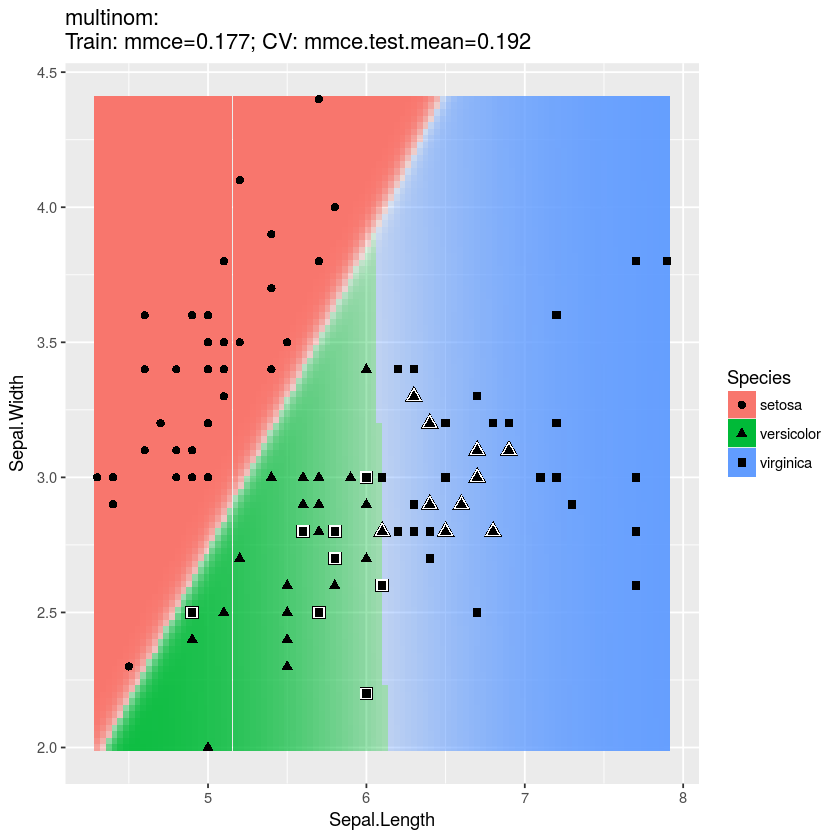

In [10]:
pp = plotLearnerPrediction(irisLearner, irisTask)
pp

# 3.  Quadratic Discriminant Analysis

- In QDA, we caclulate the posteriori class probabilities like that:
$$
p(y = k | X) = \pi_k |\Sigma_k|^{-\frac{1}{2}}\exp(- \frac{1}{2} x^T\Sigma_k^{-1}x - \frac{1}{2} \mu_k^T \Sigma_k^{-1} \mu_k + x^T \Sigma_k^{-1} \mu_k 
$$
* thus, we need those three ingredients for each of the $j = 1, ..., k$ classes:

    * $\hat{\pi}_j = \frac{n_j}{n}$ 
    * $\hat{\mu}_j = \sum_{i: y_i = j} \frac{x_i}{n_j}$  
    * $\hat{\Sigma_j} = \frac{1}{n_j - 1} \sum_{i: y_i = j} (x_i - \hat{\mu}_j) (x_i - \hat{\mu}_j)^T $  


### Implementation

Function to train the QDA model

In [11]:
trainQDA = function(target, data) {
  
  n = nrow(data)
  # which classes do we have?
  classes = levels(data[, target])
  target.col = which(colnames(data) == target)
  
  # over how many target classes do we iterate=
  k = length(classes)
  
  # initilialize empty storage list
  storage = rep(list(0), k)
  
  # calculate ingredients for each class
  for(j in 1:k) {
    
    class.j = classes[j]
    n.class = length(which(data[,target] == class.j))
    
    # prior
    prior.j = n.class / n
    
    # mu vector
    X.j = data[which(data[ ,target] == class.j), - (which(colnames(data) == target))]
    mu.j = apply(X = X.j, MARGIN = 2, mean)
    
    # covariance matrix
    cov.j = cov(X.j)
    
    # store results in nested list
    storage.j = rep(list(0), 4)
    storage.j[[1]] = class.j
    storage.j[[2]] = prior.j
    storage.j[[3]] = mu.j
    storage.j[[4]] = cov.j
    storage[[j]] = storage.j
  }
  return(storage)
}

Function to predict on a trained QDA model

In [12]:
predictQDA = function(model, data, out.mode = "probs") {
  
  # get info from model, purrr packages helps in data wrangling tasks
  classes = unlist(purrr::map(model, 1))
  p = length(unlist(model[[1]][3]))
  k = length(classes)
  
  # stupid re-transpose to stick better with lecture
  data = t(data)
  
  # calculate probabilities for each possible class
  storage = cbind(classes, rep(0, k))
  colnames(storage) = c("class", "posteriori")
  for (j in 1:k) {
    
    # retrieve the three ingredients from the trained model
    priori.j = unlist(model[[j]][2])
    mu.j = matrix(unlist(model[[j]][3]))
    cov.j = matrix(unlist(model[[j]][4]), nrow = p)
    
    # invert covariance matrix only once
    inv.cov.j = solve(cov.j)
    # compute posteriori like in lecture
    posteriori.j = priori.j * det(cov.j)^(-0.5) * 
      exp(-0.5 * t(data) %*% inv.cov.j %*% data - 0.5 * t(mu.j) %*% inv.cov.j %*% mu.j + t(data) %*% inv.cov.j %*% mu.j)
    
    # smart and elegant way
    #TODO: discuss w/ Christoph
    # dmnorm(t(data), mean = t(mu.j), varcov = cov.j*priori.j)
    
    storage[j, 2] = posteriori.j
  }
  # normalize to [0, 1] and round to 5 decimals
  storage[, 2] = round(as.numeric(storage[, 2])/ sum(as.numeric(storage[, 2])), 5)
  
  # return major class or probability scores
  if (out.mode == "category") {
    return(storage[which(storage[, 2] == max(storage[, 2])), 1])
  } else if (out.mode == "probs") {
    return(storage)
  }
}



### Evaluation

Train and test on good old iris data set

In [13]:
data(iris)
set.seed(1327)
trainSize = 3/5
trainIndices = sample(x = seq(1, nrow(iris), by = 1), size = ceiling(trainSize * nrow(iris)), replace = FALSE)
irisTrain = iris[ trainIndices, ]
irisTest = iris[ -trainIndices, ]

In [14]:
# train
model = trainQDA(target = "Species", data = irisTrain)
# predict on one observation
testPred = predictQDA(model = model, data = irisTrain[2, 1:4], out.mode = "probs")


In [15]:
# Evaluate performance on test set
# strange thing with the t(x), check that again
testPreds = apply(irisTest[, 1:4], MARGIN = 1 , 
                  function(x) predictQDA(model = model, data = t(x), out.mode = "category"))

results = data.frame(cbind(as.character(irisTest[, 5]), testPreds))
colnames(results) = c("true", "prediction")                      
print(table(results))
print(paste0("mmce: ", length(which(results$true != results$prediction)) / nrow(results)))
                      

            prediction
true         setosa versicolor virginica
  setosa         20          0         0
  versicolor      0         15         8
  virginica       0          0        17
[1] "mmce: 0.133333333333333"


# 4. naive Spam Filter



### Theory

Remember the naive Bayes formula for the posteriori probabilities:

$$
p(y = k | x) = p(y = k) * \prod_{j = 1}^p p(x_j | y = k)
$$

Thus, we need two ingredients to calculate the class-wise posteriori probabilities:

1. prioris: $p(y = k) = \frac{n_k}{n}$
2. conditional probabilities for all classes $k$ and features $j$: $p(x_j|y = k)$

We use this to implement a rudimentary spam-detector!


### Implementation

#### Data

In [18]:
library(tm)
# train data
spam = c("buy drugs online from our pharma",
  "buy insurance at low prices now")
ham = c("I was writing for statistics advice",
  "newsletter from your favorurite statistics blog",
  "good article on statistics applications")

all = c(spam, ham)
# convert to word vcorpi
corpusAll = tm::VCorpus(tm::VectorSource(all))
corpusHam = tm::VCorpus(tm::VectorSource(ham))
corpusSpam = tm::VCorpus(tm::VectorSource(spam))

# compute term document matrix
DTM = tm::DocumentTermMatrix(corpusAll)
(wordMatrix = as.data.frame(as.matrix(DTM)))
spamMatrix = wordMatrix[1:length(spam), ]
hamMatrix = wordMatrix[(length(spam) + 1):length(all), ]


advice,applications,article,blog,buy,drugs,favorurite,for,from,good,⋯,newsletter,now,online,our,pharma,prices,statistics,was,writing,your
0,0,0,0,1,1,0,0,1,0,⋯,0,0,1,1,1,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,1,1,0
0,0,0,1,0,0,1,0,1,0,⋯,1,0,0,0,0,0,1,0,0,1
0,1,1,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0


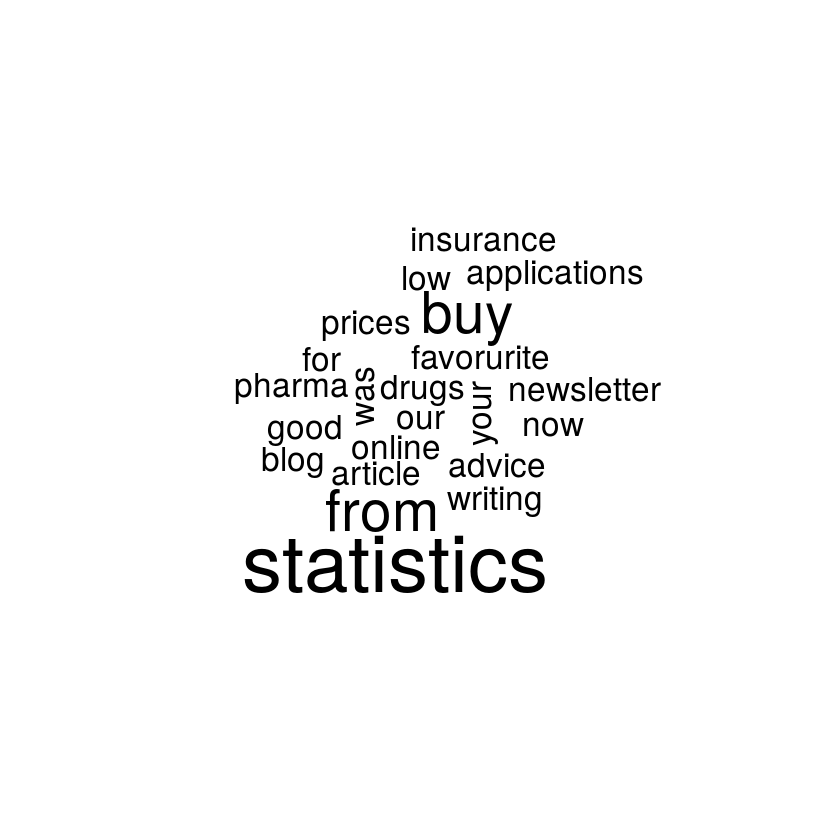

In [20]:
# Zueckerle. wordclouds per class
# All
wordcloud::wordcloud(corpusAll, min.freq = 1)


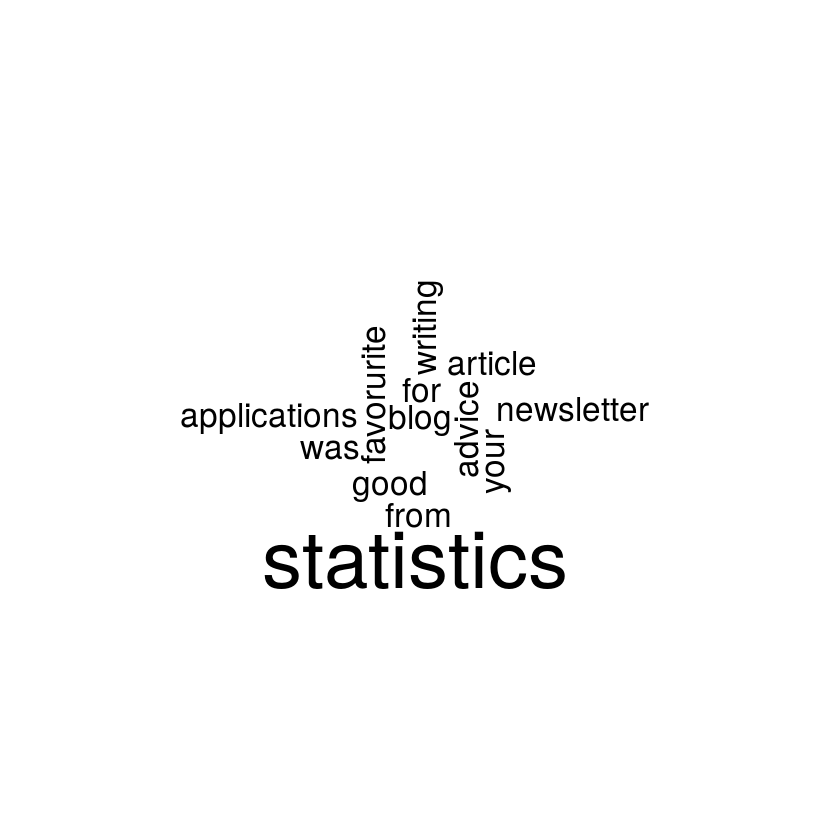

In [21]:
# Ham
wordcloud::wordcloud(corpusHam, min.freq = 1)

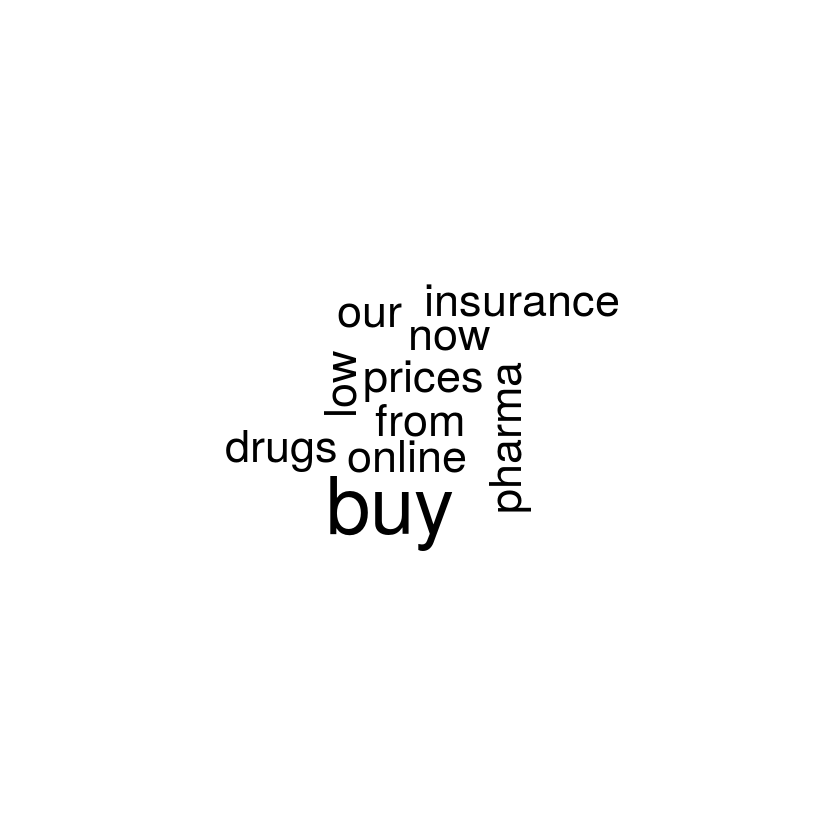

In [22]:
# Spam
wordcloud::wordcloud(corpusSpam, min.freq = 1)

#### Training

In [23]:
# calculate ingredients

# prioris:
prioriHam = length(ham) / length(all)
prioriSpam = length(spam) / length(all)

# probablity vectors for each class:
# p(occurence term | y = k)
# spam
pSpam = apply(spamMatrix, MARGIN = 2, function(x) sum(x) / nrow(spamMatrix) )
pHam = apply(hamMatrix, MARGIN = 2, function(x) sum(x) / nrow(hamMatrix))
# assign super low values to 0-prob terms: 0.01
pSpam = ifelse(pSpam == 0, 1/length(pSpam), pSpam)
pHam = ifelse(pHam == 0, 1/length(pHam), pHam)

In [24]:
# function that calculates posteriori per class
scoreClass = function(test, probVector, prior) {
  # transform to document term matrix (vector)
  testMatrix = as.data.frame(as.matrix(tm::DocumentTermMatrix(tm::VCorpus(tm::VectorSource(test)))))

  # calculate p(word occurence | y = k) for each word in test, remove NAs and multiply them
  # multiply with prior value, this is our posteriori
  return(round(prior * prod(probVector[names(testMatrix)], na.rm = TRUE), 6))
}

# wrapper for both cases
classifySpamNaive = function(test, pSpam, pHam, prioriSpam, prioriHam, output = "class") {

  # calculate posterioris
  postSpam = scoreClass(test = testMail, probVector = pSpam, prior = prioriSpam)
  postHam = scoreClass(test = testMail, probVector = pHam, prior = prioriHam)

  # classify
  class = if (postSpam > postHam) {
    class = "spam"
  } else {
    class = "ham"
  }

  # return results
  if (output == "class") {
    return(class)
  } else if (output == "probs") {
    return(list(c(postSpam = postSpam, postHam = postHam, class = class)))
  }
}

#### Test and evaluate

In [26]:
# Test on "real world data"

testMail = "buy now online low price insurance"
classifySpamNaive(test = testMail, pSpam = pSpam, pHam = pHam,
  prioriSpam = prioriSpam, prioriHam = prioriHam, output = "probs")

testMail = "buy drug based pharma insurance online"
classifySpamNaive(test = testMail, pSpam = pSpam, pHam = pHam,
  prioriSpam = prioriSpam, prioriHam = prioriHam, output = "probs")

testMail = "good article for your statistics newsletter"
classifySpamNaive(test = testMail, pSpam = pSpam, pHam = pHam,
  prioriSpam = prioriSpam, prioriHam = prioriHam, output = "probs")

testMail = "it is sunny outside, I would like to go for a walk."
classifySpamNaive(test = testMail, pSpam = pSpam, pHam = pHam,
  prioriSpam = prioriSpam, prioriHam = prioriHam, output = "probs")


[[1]]
postSpam  postHam    class 
 "0.025"      "0"   "spam"

[[1]]
postSpam  postHam    class 
  "0.05"  "3e-06"   "spam"

[[1]]
  postSpam    postHam      class 
       "0" "0.002469"      "ham"

[[1]]
  postSpam    postHam      class 
"0.018182"      "0.2"      "ham"

# 5. Different decision boundaries via mlr

We use the __mlr__ package to visualize the decision boundaries of different classifiers on the __spiral task__ from mlbench package.

This synthetic data set looks like this:

x.1,x.2,classes
0.1242744,-0.304929002,2
0.2712096,0.019774584,1
0.3585110,0.001921915,1
0.6777956,0.303582759,2
0.3457861,0.015062034,1
0.2466235,0.047263272,1


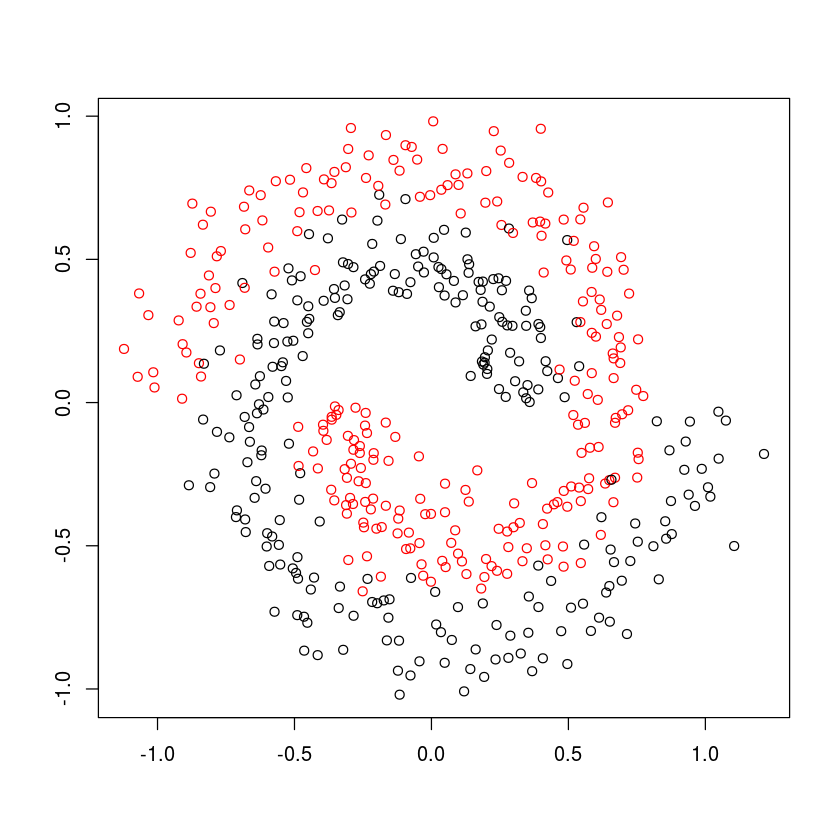

In [27]:
library(mlbench)
library(mlr)
library(BBmisc)

set.seed(123L)

mydata1 = mlbench.spirals(n = 500, sd = 0.1)
mydata2 = as.data.frame(mydata1)

head(mydata2)
plot(mydata1)


#### Comparison of the classifiers

Loading required package: kknn


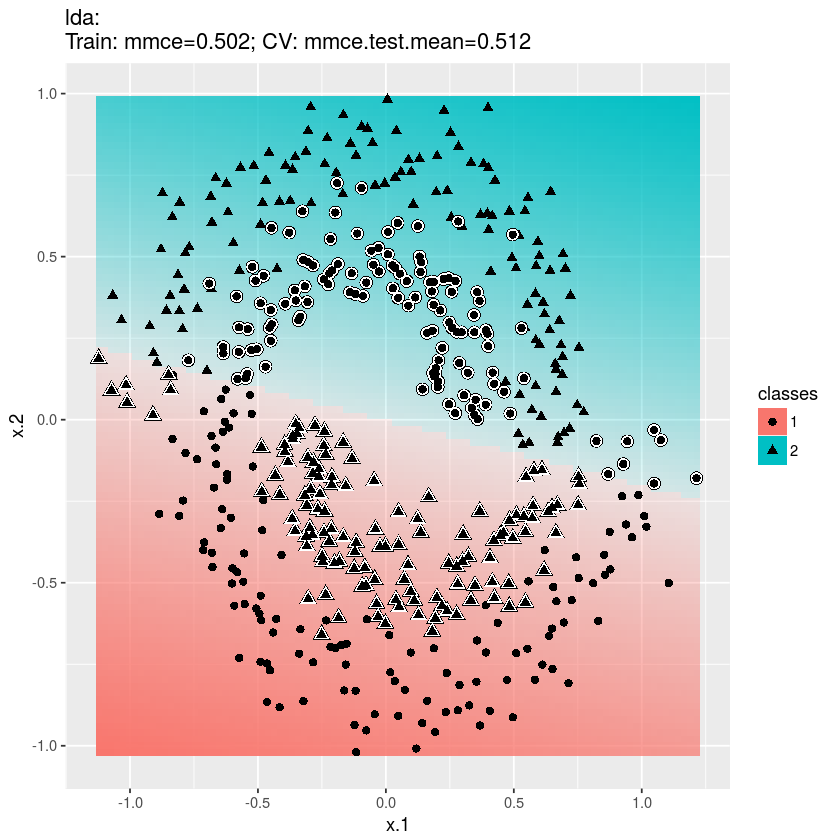

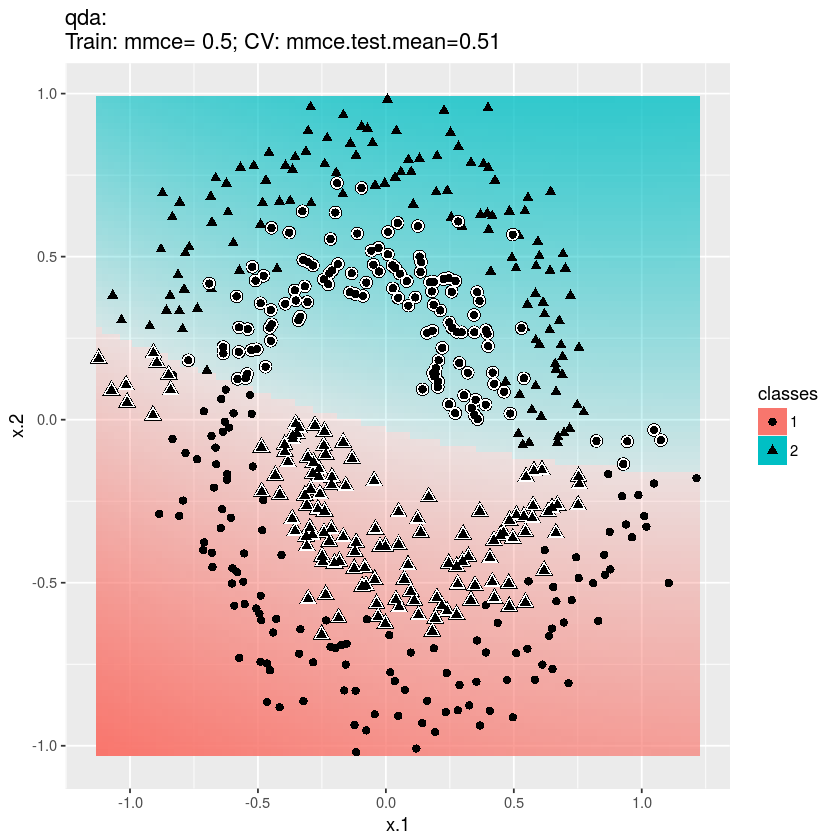

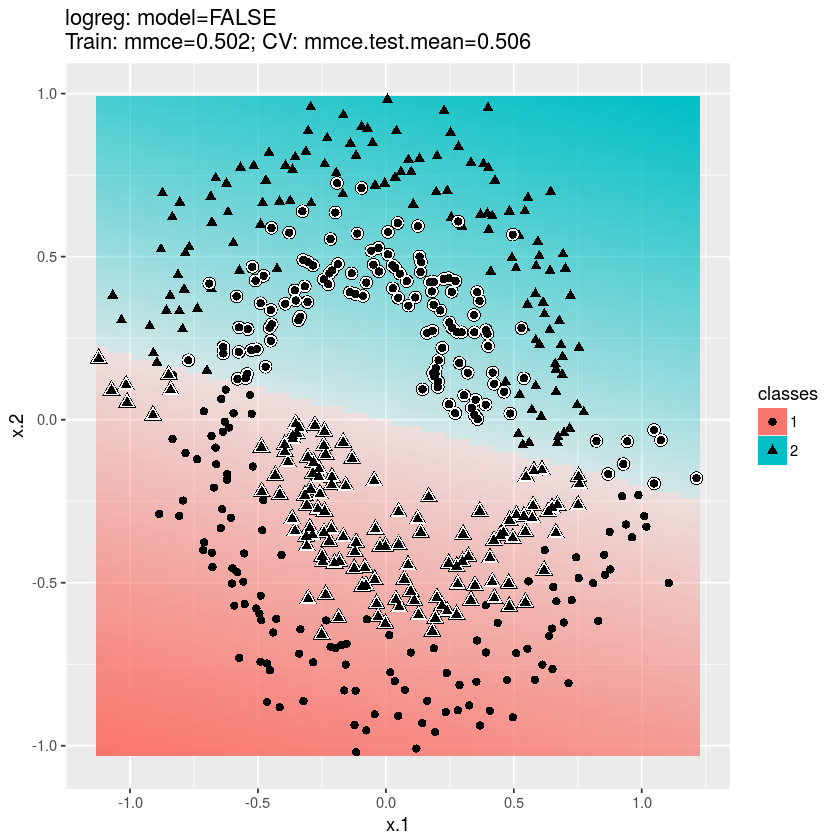

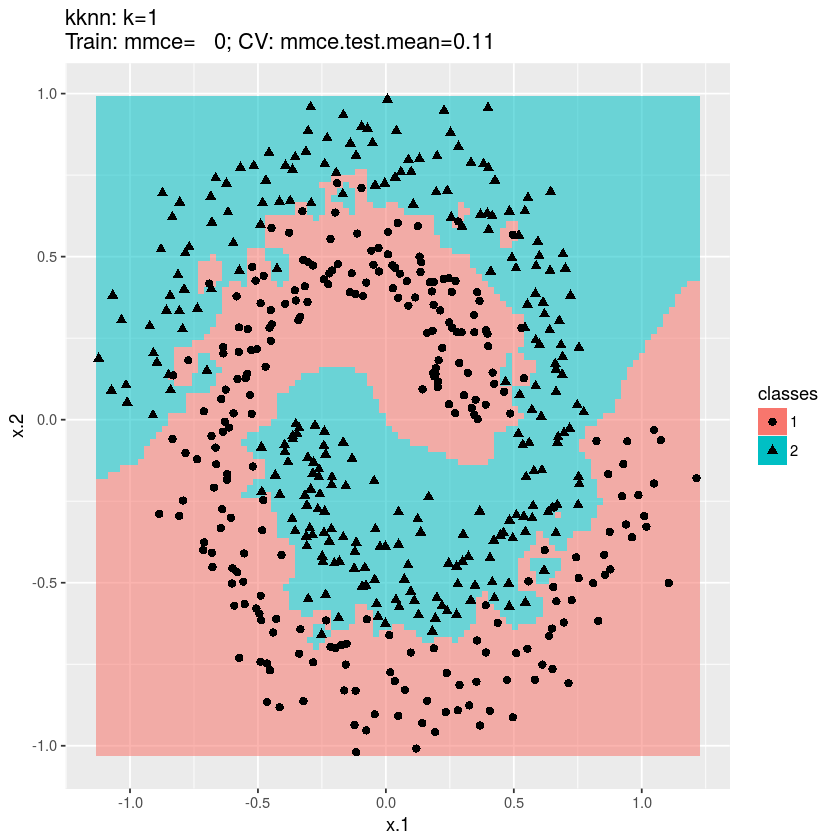

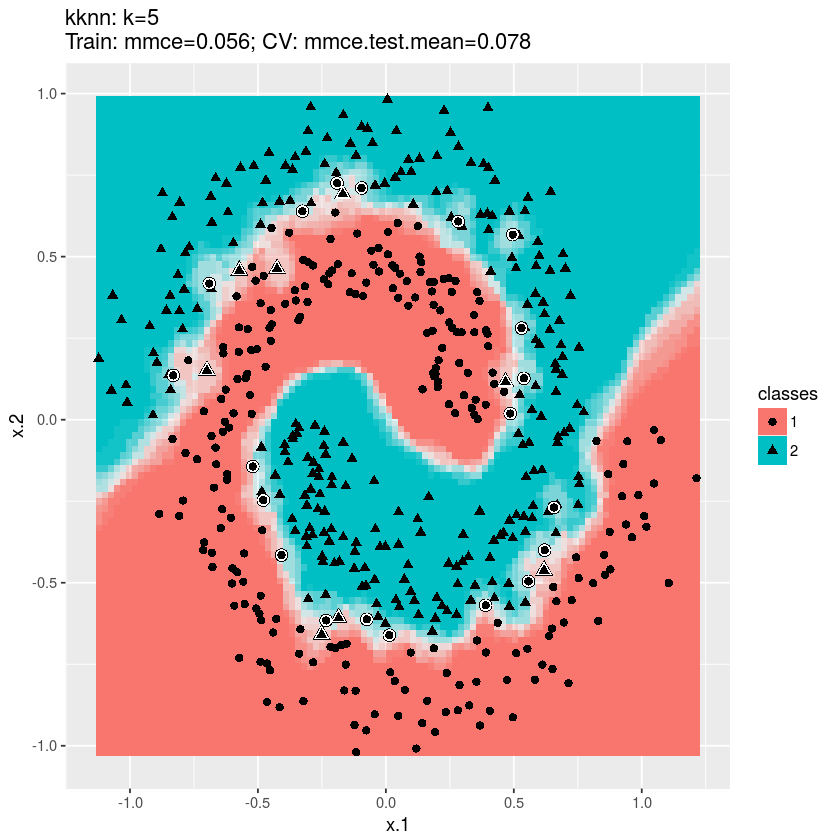

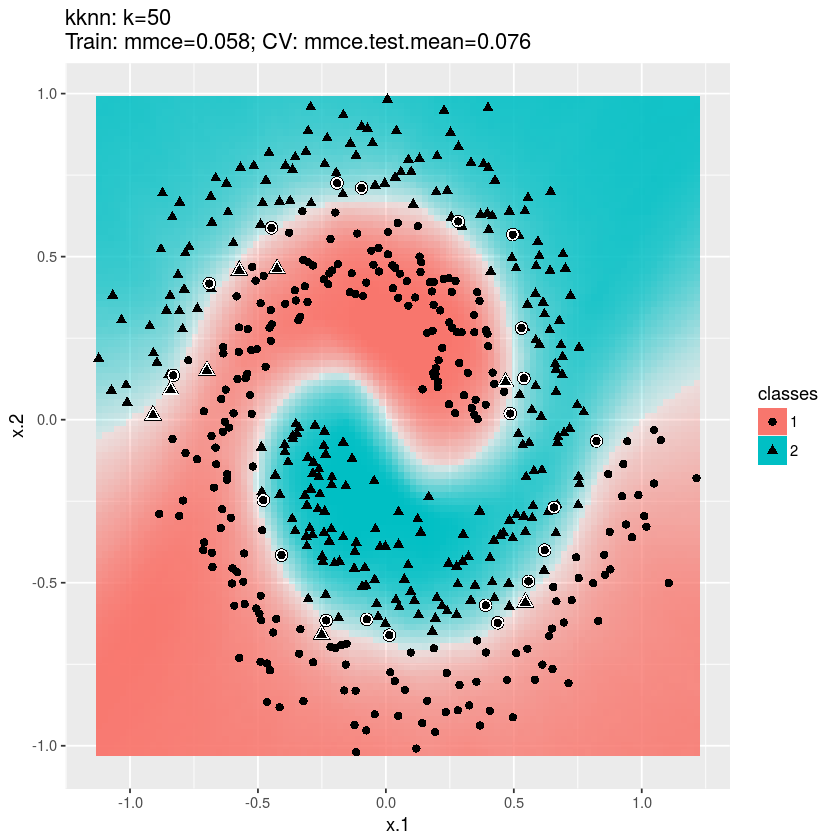

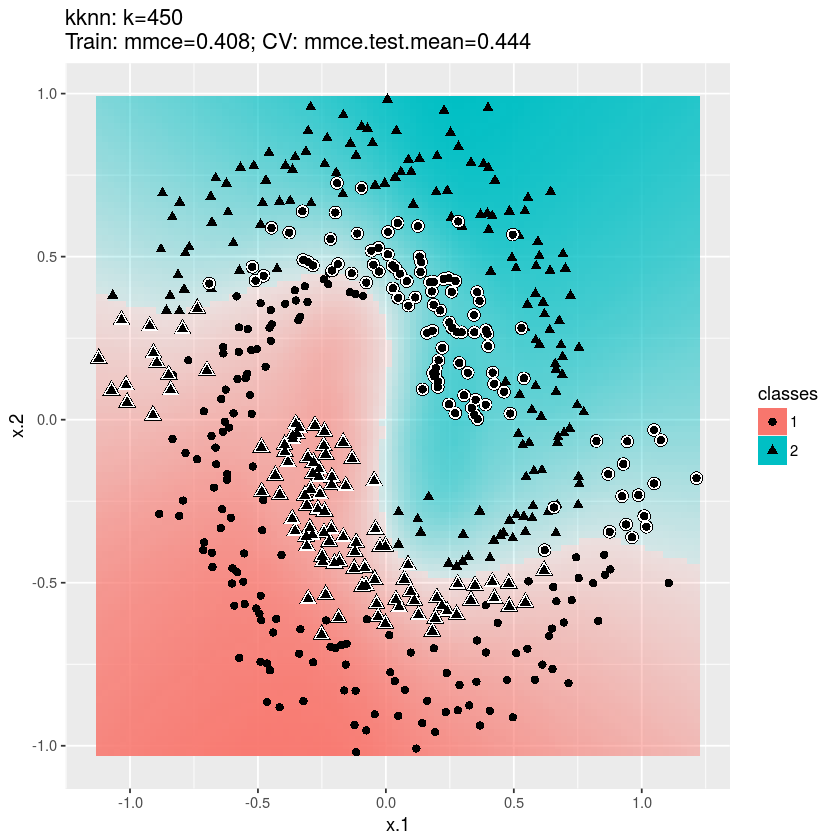

In [28]:
task = makeClassifTask(data = mydata2, target = "classes")

lrn = makeLearner("classif.kknn")

myplot = function(learner, par.vals) {
  for (j in seq_row(par.vals)) {
    learner = setHyperPars(learner, par.vals = as.list(par.vals[j, , drop = FALSE]))
    pl = plotLearnerPrediction(learner, task)
    print(pl)
    pause()
  }
}


plotLearnerPrediction("classif.lda", task)
plotLearnerPrediction("classif.qda", task)
plotLearnerPrediction("classif.logreg", task)

myplot(
  learner = makeLearner("classif.kknn"),
  par.vals = data.frame(k = c(1, 5, 50, 450))
)